# Projet Random Forest

## Rebecca Leygonie & Nemanja Kostadinovic

# Import des packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree.export import export_text
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, recall_score, classification_report, f1_score, make_scorer, precision_score

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


# Import et analyse exploratoire des données 

In [2]:
data = pd.read_csv("CarteBancaire.csv")
pd.set_option('display.max_columns', 35)

In [3]:
data.shape

(284807, 31)

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Il y a 30 features et un target (Class), les features semblent normaliser sauf Time et Amount

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,1.673327e-15,-1.254995e-15,8.176030e-16,1.206296e-15,4.913003e-15,1.437666e-15,-3.800113e-16,9.572133e-16,1.039817e-15,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
data.isnull().sum().any()

False

Pas de valeur nuls

Text(0.5, 1.0, 'Distribution des classes du dataset')

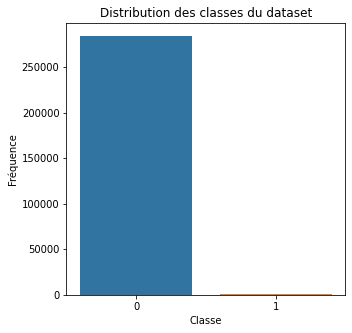

In [7]:
target, freq = np.unique(data['Class'], return_counts=True)

plt.figure(figsize=(5,5))
plt.ylabel('Fréquence', fontsize=10)
plt.xlabel('Classe', fontsize=10)
sns.barplot(target, freq)
plt.title('Distribution des classes du dataset')

Les classes (0: pas de fraude , 1: fraude) sont mal distribués si nous utilisons ces données avec notre modèle Random Forest nous allons certainement nous retrouver face à un problème de sur-apprentissage car le classifieur va supposer que dans la majorité des cas il n'y a pas de fraudes donc ne va pas pouvoir reconnaitre une opération frauduleuse et va prédire seulement la classe 0. (cette élément est déja donnée dans l'énoncé du sujet)

In [8]:
train = data.drop(['Class'], axis='columns').copy()
train.sample(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
157581,110082.0,2.037815,0.321527,-1.616959,1.356635,0.823330,-0.497569,0.443958,-0.333266,1.226057,0.053824,1.279668,-1.530908,1.607592,2.088073,-1.947551,-0.442725,0.165159,0.236344,0.046273,-0.318898,-0.082677,0.234229,-0.058537,-0.601710,0.480195,-0.515427,-0.042890,-0.084355,1.00
66212,51937.0,1.213999,0.296710,0.275315,0.644645,-0.197853,-0.606737,-0.001937,-0.056514,0.051689,-0.322127,0.129272,0.239848,0.055148,-0.229261,1.362377,0.193123,0.281662,-0.729666,-0.555561,-0.123186,-0.262023,-0.727644,0.161105,0.029764,0.138361,0.124678,-0.007482,0.027000,1.29
217199,140803.0,-0.920435,0.987817,-0.063312,1.119036,2.044779,-0.616767,1.373498,-0.198479,-1.203047,-1.057857,-0.661957,-0.228591,0.367054,-1.135852,0.036734,-0.680857,1.320352,0.352623,0.777224,0.366071,0.035964,0.022339,-0.419376,0.421122,1.222767,-0.209164,0.025969,0.102848,56.29


In [9]:
y = data[['Class']].copy()
y.sample(3)

,Class
157504,0
154374,0
146237,0


## Modèle Random Forest sur les données d'origine

   

In [10]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(train, y, test_size=0.2, random_state=0)

In [11]:
X_train1.shape

(227845, 30)

In [12]:
X_test1.shape

(56962, 30)

#### A la recherche des meilleures paramètres du classifieur

In [21]:
n_estimators = np.arange(10,100,10)

max_depth = np.arange(1,10,2)
np.append(max_depth,None)

min_samples_split = np.arange(1,10,2)
np.append(min_samples_split, None)

min_samples_leaf = np.arange(1,10,2) 
np.append(min_samples_leaf, None)

bootstrap = [True, False]
criterion = ['gini', 'entropy']

max_features = ['auto', 'sqrt']

clf1 = RandomForestClassifier()

hyperP = dict(n_estimators=n_estimators, max_depth=max_depth, 
              min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, bootstrap=bootstrap ,max_features=max_features, criterion=criterion)

grid1 = RandomizedSearchCV(clf1, hyperP, verbose=1, n_jobs=-1, scoring="accuracy")

In [22]:
bestP1 = grid1.fit(X_train1, y_train1.values.ravel()) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.4min finished


In [23]:
best_clf1 = grid1.best_estimator_
print('Les paramètres du meilleures estimateurs obtenue :\n', best_clf1)

Les paramètres du meilleures estimateurs obtenue :
 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


best_clf1_cpy =  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
print('Score moyen en utilisant la cross-validation du meilleure estimateur:', grid1.best_score_ )

Score moyen en utilisant la cross-validation du meilleure estimateur: 0.9995303824968728


In [113]:
predicted1 = best_clf1.predict(X_test1)
score1 = accuracy_score(y_test1, predicted1)
recall_score1 = recall_score(y_test1,predicted1)
print('Accuracy: ', score1)
print("Taux d'erreur :",1-score1)
print('Recall score : ', recall_score1)
print("Miss-rate : ", 1-recall_score1)

Accuracy:  0.9994557775359011
Taux d'erreur : 0.0005442224640989091
Recall score :  0.7623762376237624
Miss-rate :  0.2376237623762376


In [26]:
print(classification_report(y_test1, predicted1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.92      0.76      0.83       101

    accuracy                           1.00     56962
   macro avg       0.96      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



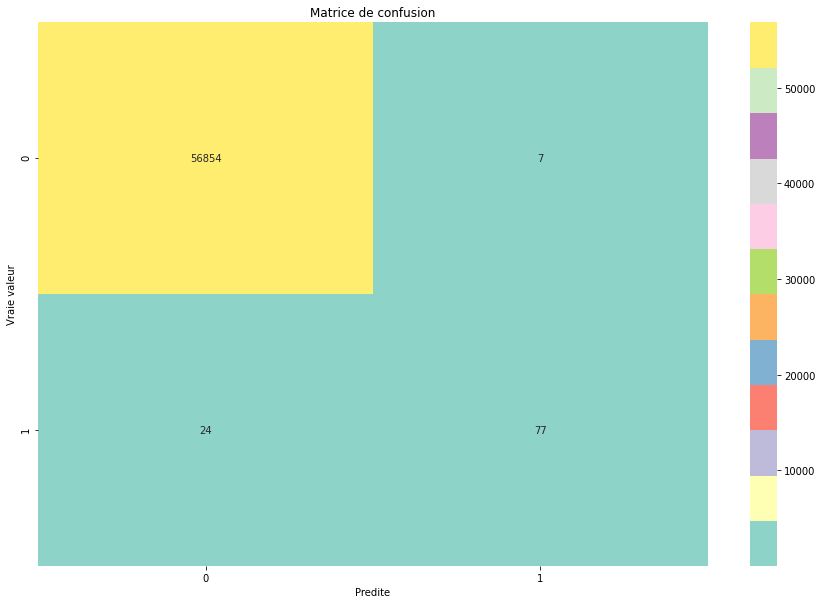

In [27]:
conf_mat = confusion_matrix(y_test1, predicted1)
labels = ['0','1']
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, cmap="Set3", fmt="d", xticklabels = labels, yticklabels = labels)
plt.ylabel('Vraie valeur')
plt.xlabel('Predite')
plt.title('Matrice de confusion')
plt.show()

On remarque bien le phénomène de sur-apprentissage sur les données, nous allons ensuite échantilloné nos données

In [28]:
def min_max_classifieur(Rd,n_estimators,X_test,y_test):
    min=1
    max=0
    i_min=100000
    i_max=100000
    for i in range (0,n_estimators):
        clf=Rd.estimators_[i]
        predicted=clf.predict(X_test)
        score=recall_score(y_test,predicted)
        if (score<min):
            min =score
            i_min=i
        else:
            if (score>max):
                max=score
                i_max=i
    
    print("i_min :",i_min, ", recall_min :",min,"miss-rate max: ", 1-min)
    print("i_max :",i_max, ", recall_max :" ,max,"miss-rate min :", 1-max)     

In [29]:
min_max_classifieur(best_clf1,60,X_test1,y_test1)

i_min : 4 , recall_min : 0.6039603960396039 miss-rate max:  0.39603960396039606
i_max : 55 , recall_max : 0.801980198019802 miss-rate min : 0.19801980198019797


## Modèle RandomForest sur les données sous-échantilloné (under-sampling)

In [68]:
rus = RandomUnderSampler()
X_under_sampled, y_under_sampled = rus.fit_resample(train, y)

In [69]:
X_under_sampled.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
775,88672.0,-3.859881,2.632881,-5.264265,3.446113,-0.675231,-1.904959,-3.291041,-0.985766,-1.168114,-3.936294,4.256564,-6.600654,0.005626,-9.958531,2.471358,-5.700141,-6.388093,-1.838159,2.993174,-0.178626,1.664119,0.785075,0.068412,0.778961,-0.863166,-0.006810,-1.065734,1.773326,1.18
680,57007.0,-1.271244,2.462675,-2.851395,2.324480,-1.372245,-0.948196,-3.065234,1.166927,-2.268771,-4.881143,2.255147,-4.686387,0.652375,-6.174288,0.594380,-4.849692,-6.536521,-3.119094,1.715494,0.560478,0.652941,0.081931,-0.221348,-0.523582,0.224228,0.756335,0.632800,0.250187,0.01
267,97.0,1.273818,0.058009,-1.312428,-0.048969,2.244373,3.296211,-0.342625,0.760870,-0.154915,0.068385,-0.161824,0.029225,-0.020632,0.528189,1.105977,0.375592,-0.926725,0.292544,-0.002887,0.008906,-0.017292,-0.182883,-0.146981,1.004700,0.842883,-0.314281,0.013744,0.015907,17.80
60,113616.0,2.116138,0.148913,-1.951318,0.276762,0.715665,-0.536759,0.181033,-0.204774,0.518076,-0.380792,-1.082825,0.008552,0.279728,-0.902143,0.236776,0.485377,0.250161,-0.126420,0.276953,-0.128463,-0.402284,-1.045790,0.264229,-0.059340,-0.174885,0.208246,-0.062853,-0.036178,2.28
320,167026.0,1.984022,0.430169,-2.301922,1.381182,0.979319,-0.677583,0.520665,-0.148441,-0.028691,-0.171518,1.063577,0.332144,-1.096824,-0.653474,-0.948880,-0.008735,0.806757,0.603900,-0.151054,-0.262399,0.006944,0.156618,0.010011,0.561471,0.421488,-0.539657,-0.009613,-0.033510,7.63


In [70]:
len(X_under_sampled)

984

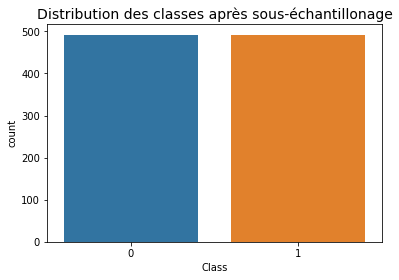

In [71]:
sns.countplot('Class', data= y_under_sampled)
plt.title('Distribution des classes après sous-échantillonage', fontsize=14)
plt.show()

In [72]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_under_sampled, y_under_sampled, test_size=0.2, random_state=0)

In [73]:
X_train2.shape

(787, 30)

In [74]:
X_test2.shape

(197, 30)

#### A la recherche des meilleures paramètres du classifieur

In [75]:
n_estimators = np.arange(10,100,1)

max_depth = np.arange(1,10,2)
np.append(max_depth,None)

min_samples_split = np.arange(1,10,2) 
np.append(min_samples_split, None)

min_samples_leaf = np.arange(1,10,2) 
np.append(min_samples_leaf, None)

bootstrap = [True, False]
criterion = ['gini', 'entropy']

clf2 = RandomForestClassifier()

hyperP = dict(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, bootstrap=bootstrap,criterion=criterion)

grid2 = GridSearchCV(clf2, hyperP, verbose=1, n_jobs=-1, scoring="recall") #cv=3

bestP2 = grid2.fit(X_train2, y_train2.values.ravel())

Après 225000 combinaison différentes d'hyper paramètres et 72.0min sur un cluster Hadoop voici le modèle Random Forest le plus performant c'est-à-dire avec le recall score le plus bas

best_clf2 = grid2.best_estimator_
print('Les paramètres du meilleur estimateurs obtenue :\n', best_clf2)

In [88]:
##Best CLF2 recall score copie pour ne pas relancer le GridSearch

best_clf2 =  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [92]:
print('Score moyen en utilisant la cross-validation du meilleure estimateur:',grid2.best_score_ )

Score moyen en utilisant la cross-validation du meilleure estimateur: 0.9223110223110222


In [95]:
best_clf2.fit(X_train2, y_train2.values.ravel())
training_score = cross_val_score(best_clf2, X_train2, y_train2.values.ravel(), cv=5)
print(training_score)

[0.94303797 0.93670886 0.91082803 0.94904459 0.93630573]


In [96]:
predicted2 = best_clf2.predict(X_test2)
score2 = accuracy_score(y_test2, predicted2)
recall_score2 = recall_score(y_test2, predicted2)
f1_score2 = f1_score(y_test2, predicted2)
print('Score obtenue sur nos données test (sous-échantilloné): ', score2)
print("Taux d'erreur :", 1-score2)
print('Recall score obtenue sur nos données test: ', recall_score2)
print("miss-rate : ", 1-recall_score2)

Score obtenue sur nos données test (sous-échantilloné):  0.9390862944162437
Taux d'erreur : 0.060913705583756306
Recall score obtenue sur nos données test:  0.8962264150943396
miss-rate :  0.10377358490566035


#### Appliquons maintenant notre classifieur entrainer sur les données sous-échnatilloné avec les données test d'origine

In [101]:
predicted3 = best_clf2.predict(X_test1)
score3 = accuracy_score(y_test1, predicted3)
recall_score3 = recall_score(y_test1, predicted3)
print('Accuracy: ', score3)
print("Taux d'erreur :", 1-score3)
print('Recall score : ', recall_score3)
print("miss-rate :",1-recall_score3)


Accuracy:  0.9699097644043397
Taux d'erreur : 0.030090235595660264
Recall score :  0.9603960396039604
miss-rate : 0.03960396039603964


In [102]:
min_max_classifieur(best_clf2,10,X_test1,y_test1)

i_min : 0 , recall_min : 0.9207920792079208 miss-rate max:  0.07920792079207917
i_max : 2 , recall_max : 0.9801980198019802 miss-rate min : 0.01980198019801982


In [104]:
estimator_min = best_clf2.estimators_[0]
predicted_min=estimator_min.predict(X_test1)
recall_score_min=recall_score(y_test1,predicted_min)
print('Recall score : ', recall_score_min)
print("miss-rate :",1-recall_score_min)

Recall score :  0.9207920792079208
miss-rate : 0.07920792079207917


In [105]:
estimator_max = best_clf2.estimators_[2]
predicted_max=estimator_max.predict(X_test1)
recall_score_max=recall_score(y_test1,predicted_max)
print('Recall score : ', recall_score_max)
print("miss-rate :",1-recall_score_max)

Recall score :  0.9801980198019802
miss-rate : 0.01980198019801982


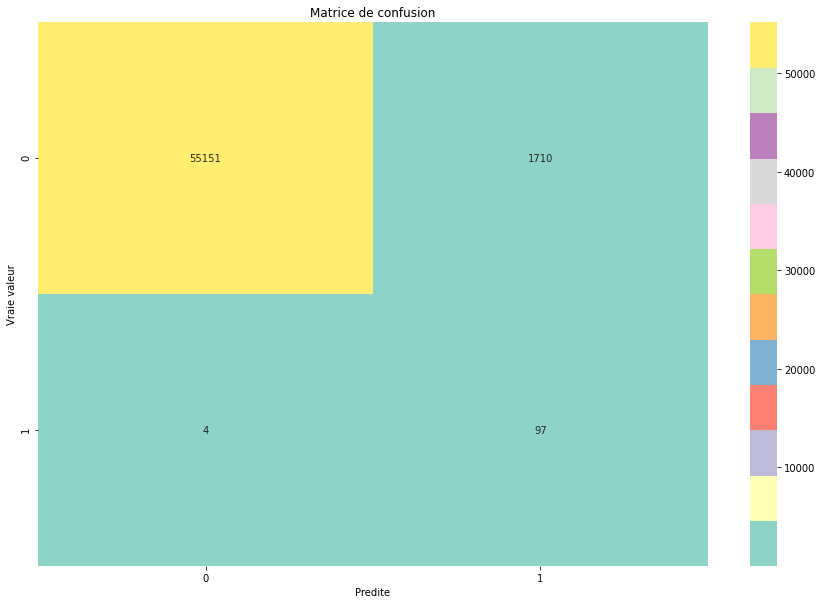

In [106]:
conf_mat = confusion_matrix(y_test1, predicted3)
labels = ['0','1']
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, cmap="Set3", fmt="d", xticklabels = labels, yticklabels = labels)
plt.ylabel('Vraie valeur')
plt.xlabel('Predite')
plt.title('Matrice de confusion')
plt.show()

In [107]:
print(classification_report(y_test1, predicted3))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56861
           1       0.05      0.96      0.10       101

    accuracy                           0.97     56962
   macro avg       0.53      0.97      0.54     56962
weighted avg       1.00      0.97      0.98     56962



Meilleure score que sur les données sous échantilloné et testé sur un sous echantillon aussi

In [114]:
estimator_min = best_clf2.estimators_[0]

export_graphviz(estimator_min, out_file='tree_min.dot', 
                feature_names = X_train1.columns,
                class_names = ['0','1'],
                rounded = True, proportion = True, 
                precision = 2, filled = True)

#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=60'])
#Image(filename = 'tree.png')

In [115]:
estimator_max = best_clf2.estimators_[2]

export_graphviz(estimator_max, out_file='tree_max.dot', 
                feature_names = X_train1.columns,
                class_names = ['0','1'],
                rounded = True, proportion = True, 
                precision = 2, filled = True)

#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=60'])
#Image(filename = 'tree.png')

In [116]:
for i in range(0,10):
    clf=best_clf2.estimators_[i]
    predicted=clf.predict(X_test1)
    score=accuracy_score(y_test1,predicted)
    re_score=recall_score(y_test1,predicted)
    print("Estimator n° :",i,",accuracy score :",score,", recall sore : ",re_score,", taux-d'erreur : ",1-score,", miss-rate",1-re_score,"\n" )

Estimator n° : 0 ,accuracy score : 0.9401004178224079 , recall sore :  0.9207920792079208 , taux-d'erreur :  0.05989958217759206 , miss-rate 0.07920792079207917 

Estimator n° : 1 ,accuracy score : 0.9181208524981567 , recall sore :  0.9603960396039604 , taux-d'erreur :  0.08187914750184333 , miss-rate 0.03960396039603964 

Estimator n° : 2 ,accuracy score : 0.9138021839120818 , recall sore :  0.9801980198019802 , taux-d'erreur :  0.08619781608791821 , miss-rate 0.01980198019801982 

Estimator n° : 3 ,accuracy score : 0.9336575260700116 , recall sore :  0.9405940594059405 , taux-d'erreur :  0.06634247392998838 , miss-rate 0.05940594059405946 

Estimator n° : 4 ,accuracy score : 0.9038657350514377 , recall sore :  0.9702970297029703 , taux-d'erreur :  0.09613426494856225 , miss-rate 0.02970297029702973 

Estimator n° : 5 ,accuracy score : 0.9294617464274428 , recall sore :  0.9306930693069307 , taux-d'erreur :  0.07053825357255716 , miss-rate 0.06930693069306926 

Estimator n° : 6 ,accu

In [118]:
moy = (0.07920792079207917+0.01980198019801982)/2

In [119]:
diff = moy - 0.01980198019801982 

In [120]:
diff

0.029702970297029674

### La fonction suivante vient de : https://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree
Modifié afin de convenir à l'énoncé

In [227]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    pathto=dict()

    global k
    k = 0
    def recurse(node, depth, parent):
        global k
        indent = "  " * depth

        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            s= "{} <= {} ".format( name, threshold, node )
            if node == 0:
                pathto[node]=s
            else:
                pathto[node]=pathto[parent]+' & ' +s

            recurse(tree_.children_left[node], depth + 1, node)
            s="{} > {}".format( name, threshold)
            if node == 0:
                pathto[node]=s
            else:
                pathto[node]=pathto[parent]+' & ' +s
            recurse(tree_.children_right[node], depth + 1, node)
        else:
            k=k+1
            print(k,')',pathto[parent],'-->', np.argmax(tree_.value[node]))
    recurse(0, 1, 0)

In [230]:
tree_to_code(best_clf2.estimators_[0], ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])

1 ) V5 <= -1.8324214220046997  & V4 <= 0.71916264295578  & V2 <= -0.22304320521652699  --> 0
2 ) V5 <= -1.8324214220046997  & V4 <= 0.71916264295578  & V2 > -0.22304320521652699 & V1 <= -2.5569714307785034  --> 0
3 ) V5 <= -1.8324214220046997  & V4 <= 0.71916264295578  & V2 > -0.22304320521652699 & V1 > -2.5569714307785034 --> 1
4 ) V5 <= -1.8324214220046997  & V4 > 0.71916264295578 --> 1
5 ) V5 > -1.8324214220046997 & V3 <= -1.9829692840576172  & V16 <= -0.9037880599498749  & V11 <= 0.7448752820491791  & V10 <= 0.5007731094956398  --> 1
6 ) V5 > -1.8324214220046997 & V3 <= -1.9829692840576172  & V16 <= -0.9037880599498749  & V11 <= 0.7448752820491791  & V10 > 0.5007731094956398 --> 0
7 ) V5 > -1.8324214220046997 & V3 <= -1.9829692840576172  & V16 <= -0.9037880599498749  & V11 > 0.7448752820491791 --> 1
8 ) V5 > -1.8324214220046997 & V3 <= -1.9829692840576172  & V16 > -0.9037880599498749 & V9 <= -1.7832927703857422  --> 1
9 ) V5 > -1.8324214220046997 & V3 <= -1.9829692840576172  & V16 

In [231]:
tree_to_code(best_clf2.estimators_[2], ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])

1 ) V12 <= -2.2581019401550293  & V14 <= -0.10925865545868874  --> 1
2 ) V12 <= -2.2581019401550293  & V14 > -0.10925865545868874 & V3 <= -0.5150710493326187  --> 1
3 ) V12 <= -2.2581019401550293  & V14 > -0.10925865545868874 & V3 > -0.5150710493326187 & V20 <= -0.04878407157957554  --> 0
4 ) V12 <= -2.2581019401550293  & V14 > -0.10925865545868874 & V3 > -0.5150710493326187 & V20 > -0.04878407157957554 --> 0
5 ) V12 > -2.2581019401550293 & V11 <= 1.8204920291900635  & V4 <= 1.6555220484733582  & V8 <= 0.27470847964286804  & V4 <= -0.47919346392154694  & V23 <= 0.06764522567391396  --> 0
6 ) V12 > -2.2581019401550293 & V11 <= 1.8204920291900635  & V4 <= 1.6555220484733582  & V8 <= 0.27470847964286804  & V4 <= -0.47919346392154694  & V23 > 0.06764522567391396 & V22 <= 0.32876746356487274  --> 0
7 ) V12 > -2.2581019401550293 & V11 <= 1.8204920291900635  & V4 <= 1.6555220484733582  & V8 <= 0.27470847964286804  & V4 <= -0.47919346392154694  & V23 > 0.06764522567391396 & V22 > 0.32876746356